<a href="https://colab.research.google.com/github/suajeong52/heaveMPM/blob/main/0509_TEST_MFK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install smt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.1/256.1 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for smt: filename=smt-1.3.0-cp310-cp310-linux_x86_64.whl size=654317 sha256=be89be8a26bfac86c1a44954cb72b4ec6c19c26659e9132052a9bb4215b89216
  Stored in directory: /root/.cache/pip/wheels/3b/d3/c7/5455cf3d853cb05d5b2e50ffc8085af8f2a31e15b4718a3bd9
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25537 sha256=00c95e4fd0ed8d8303b5c55439147937948ce3f52f9bbb99e1a07219218a5a22
  Stored in directory: /root/.cache/pip/wheels/46/1f/29/6fda5c72f950841e39147ae603780ee913a62f977b4ad47ee4
Successfully built smt pyDOE2


In [3]:
import numpy as np
from smt.sampling_methods import LHS
from smt.utils import compute_rms_error
from smt.applications import MFK
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
xH = pd.read_excel('xt_H.xlsx', usecols=[1]).values
xL = pd.read_excel('xt_L.xlsx', usecols=[1]).values

yH = pd.read_excel('mpmH.xlsx', usecols=[1]).values
yL = pd.read_excel('mpmL.xlsx', usecols=[1]).values



# Sample the test points using LHS
xlimits = np.array([[19.00, 20.00]])
sampling = LHS(xlimits=xlimits, criterion='ese', random_state=1)

test_num = 3
X_test = sampling(test_num)


# Fit the MFK model
sm = MFK(theta0=xH.shape[1] * [1.0], print_prediction=True)


sm.set_training_values(xH, yH)
# high-fidelity dataset without name
sm.set_training_values(xL, yL, name=0)


sm.train()

# Predict on the test points
y_pred= sm.predict_values(X_test)
mse = sm.predict_variances(X_test)
derivs = sm.predict_derivatives(X_test, kx=0)


___________________________________________________________________________
   
                                    MFK
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 7
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.2317982
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 3
   
   Predicting ...
   Predicting - done. Time (sec):  0.0009539
   
   Prediction time/pt. (sec) :  0.0003180
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 3
   
   Predicting ...
   Predicting - done. Time (sec):  0.0009916
   
   Prediction time/pt. (sec) :  0.0003305
   


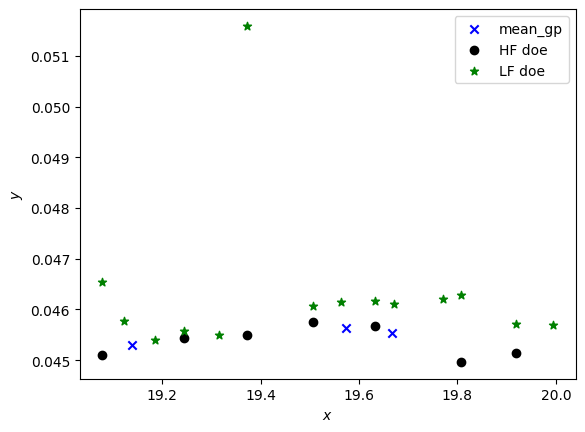

In [13]:
plt.figure()

#plt.plot(X_test, y_pred, label="reference")
plt.scatter(X_test, y_pred, marker="x",color="b", label="mean_gp")
plt.scatter(xH, yH, marker="o", color="k", label="HF doe")
plt.scatter(xL, yL, marker="*", color="g", label="LF doe")

plt.legend(loc=0)
#plt.ylim(-10, 17)
#plt.xlim(-0.1, 1.1)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()

In [14]:
print(X_test)
print(y_pred)

[[19.13900733]
 [19.66670479]
 [19.5734415 ]]
[[0.04529023]
 [0.04554028]
 [0.04563886]]


In [16]:
y_real = pd.read_excel('mpmtest.xlsx', usecols=[1]).values
print(y_real)

[[0.04563615]
 [0.04607022]
 [0.04606842]]


In [17]:
#mesh low로 구했을때의 정확도? 비율?
yP = y_pred/y_real
print(yP)

[[0.99242008]
 [0.98849714]
 [0.99067566]]
